In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from enum import Enum
from typing import List

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [4]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [5]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [6]:
def draw_polygon_colors_dict(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in polygon:
        if colors[i]==0:
            points_start.append(i)
        elif colors[i]==1:
            points_end.append(i)
        elif colors[i]==2:
            points_connect.append(i)
        elif colors[i]==3:
            points_divide.append(i)
        elif colors[i]==4:
            points_regular.append(i)

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [7]:
def draw_polygon_triangulation(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)

    for a, b in tri:
        vis.add_line_segment([polygon[a], polygon[b]], color='red')
    vis.show()

In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

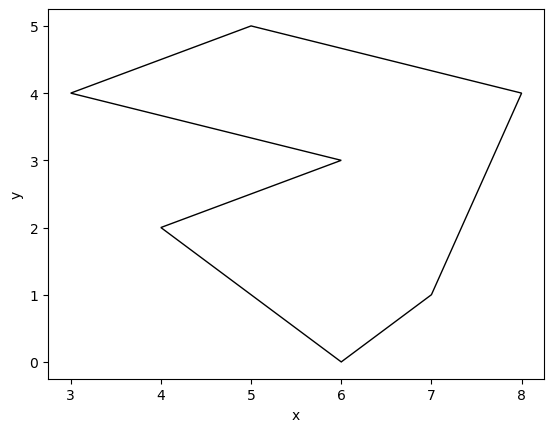

In [9]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [10]:

def get_polygon_points(max_x, max_y, points_data):
    %matplotlib tk
    fig = plt.figure()
    fig.set_label('Polygon Points')
    ax = fig.add_subplot(111)
    ax.set_title(f"Please select points for the polygon in counter-clockwise order")
    ax.set_xlim([0, max_x])
    ax.set_ylim([0, max_y])

    cid = None

    def onclick(event):
        plt.plot(event.xdata, event.ydata, 'bo')
        points_data.append((event.xdata, event.ydata))
        ax.annotate(f"{len(points_data)}", xy=(event.xdata, event.ydata))
        fig.canvas.draw()

    def on_close(event):
        fig.canvas.mpl_disconnect(cid)
        plt.close(fig)
        %matplotlib inline
        
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    cid = fig.canvas.mpl_connect('close_event', on_close)
    plt.show()

In [19]:
polygon = []
get_polygon_points(10, 10, polygon)

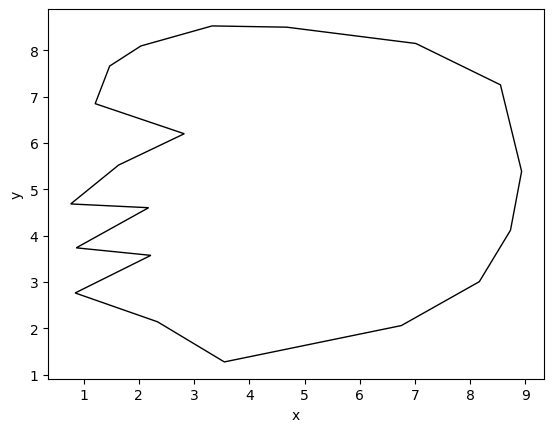

In [20]:
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [21]:
def find_min_y_point(polygon):
    N = len(polygon)
    
    i_min_point = 0
    for i in range(1, N):
        if polygon[i][1] < polygon[i_min_point][1]:
            i_min_point = i

    return i_min_point

In [22]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    N = len(polygon)
    i_min_point = find_min_y_point(polygon)
    
    class Direction(Enum):
        UP = 0
        DOWN = 1
        
    dir = Direction.UP
    
    i = (i_min_point + 1) % N
    while i != i_min_point:
        if dir == Direction.UP:
            if polygon[i][1] <= polygon[i-1][1]:
                dir = Direction.DOWN
        elif dir == Direction.DOWN:
            if polygon[i][1] > polygon[i-1][1]:
                return False

        i += 1
        i %= N

    return True

Przeprowadź test poprawności powyższej funkcji.

In [23]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.008s


Sprawdź monotoniczność swojego wielokątu.

In [24]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

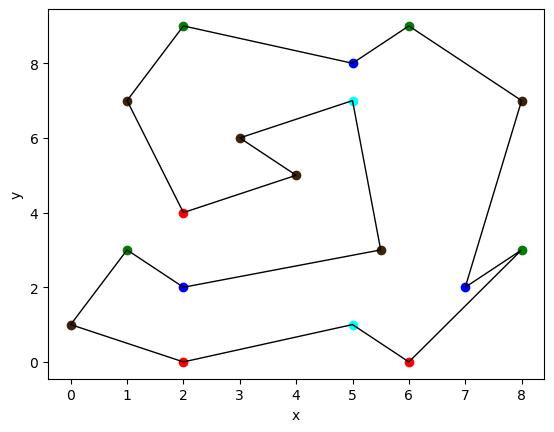

In [25]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [26]:
def det(a ,b, c):
    '''
    Funkcja zwraca wyznacznik macierzy 2x2 iloczynu wektorowego miedzy wektorami ab bc
    '''
    return (b[0] - a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

In [27]:
class Vertex(Enum):
        START = 0
        END = 1
        CONNECT = 2
        DIVIDE = 3
        REGULAR = 4

In [28]:
def classify_point(polygon, T, i):
    N = len(polygon)
    
    angle = det(polygon[i-1], polygon[i], polygon[(i+1)%N])
        
    if angle > 0 and polygon[(i + 1)%N][1] < polygon[i][1] and polygon[i-1][1] < polygon[i][1]:
        T[i] = Vertex.START.value
    elif angle > 0 and polygon[(i + 1)%N][1] > polygon[i][1] and polygon[i-1][1] > polygon[i][1]:
        T[i] = Vertex.END.value
    elif angle < 0 and polygon[(i + 1)%N][1] < polygon[i][1] and polygon[i-1][1] < polygon[i][1]:
        T[i] = Vertex.DIVIDE.value
    elif angle < 0 and polygon[(i + 1)%N][1] > polygon[i][1] and polygon[i-1][1] > polygon[i][1]:
        T[i] = Vertex.CONNECT.value
    else:
        T[i] = Vertex.REGULAR.value

In [29]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    N = len(polygon)
    T = [Vertex.REGULAR.value]*N

    i_min_point = find_min_y_point(polygon)
    classify_point(polygon, T, i_min_point)

    i = (i_min_point + 1)%N
    while i != i_min_point:
        classify_point(polygon, T, i)

        i += 1
        i %= N
        

    return T

Przeprowadź test poprawności powyższej funkcji. 

In [30]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

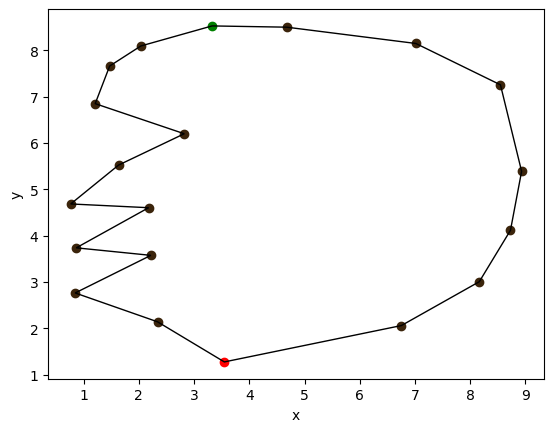

In [31]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

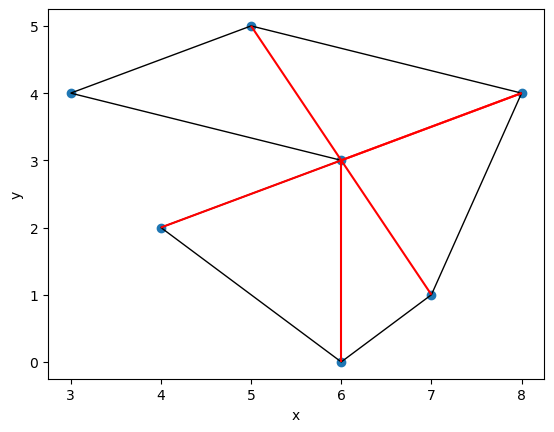

In [32]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [33]:
class Chain(Enum):
    LEFT = 0
    RIGHT = 1

In [34]:
def get_chains(polygon):
    N = len(polygon)
    i_min_point = find_min_y_point(polygon)
    chains = {}
    
    class Direction(Enum):
        UP = 0
        DOWN = 1
        
    dir = Direction.UP
    
    i = (i_min_point + 1) % N
    while i != i_min_point:
        if dir == Direction.UP:
            if polygon[i][1] <= polygon[i-1][1]:
                dir = Direction.DOWN
                chains[polygon[i]] = Chain.LEFT.value
            else:
                chains[polygon[i]] = Chain.RIGHT.value
        elif dir == Direction.DOWN:
            chains[polygon[i]] = Chain.LEFT.value

        i += 1
        i %= N
    
    chains[polygon[i_min_point]]  = Chain.LEFT.value

    return chains

In [35]:
def check_triangle(chains, a, b, c):
    if chains[b] == Chain.LEFT.value:
        return det(a, b, c) > 10**-14
    else:
        return det(a, b, c) < -10**-14

In [36]:
def add_diagonal(diagonals, polygon, a, b):
    index_a = polygon.index(a)
    index_b = polygon.index(b)

    if abs(index_a - index_b) == 1:
        return
    
    if (index_a == 0 and index_b == len(polygon) - 1 )or (index_a  == len(polygon) - 1 and index_b == 0):
        return
    
    if len(diagonals) < len(polygon) - 2:
        diagonals.add((a, b))

In [37]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    if not is_y_monotonic(polygon):
        return []
    
    polygon_copy = polygon.copy()
    N = len(polygon)
    chains = get_chains(polygon)
    polygon = sorted(polygon, key=lambda x: x[1], reverse=True)

    S = [polygon[0], polygon[1]]

    diagonals = set()

    for i in range(2, N):
        if chains[S[-1]] != chains[polygon[i]]:
            top = S[-1]
            while len(S) > 0:
                p = S.pop()
                add_diagonal(diagonals, polygon_copy, polygon[i], p)

            S.append(top)
            S.append(polygon[i])
        else:
            p = S.pop()
            while len(S) > 0 and check_triangle(chains, S[-1], p, polygon[i]):
                add_diagonal(diagonals, polygon_copy, polygon[i], S[-1])
                add_diagonal(diagonals, polygon_copy, polygon[i], p)

                p = S.pop()
            
            S.append(p)
            S.append(polygon[i])

    tri = [(polygon_copy.index(x), polygon_copy.index(y)) for x, y in diagonals]
    draw_polygon_triangulation(polygon_copy,tri)
    
    return tri


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.456s


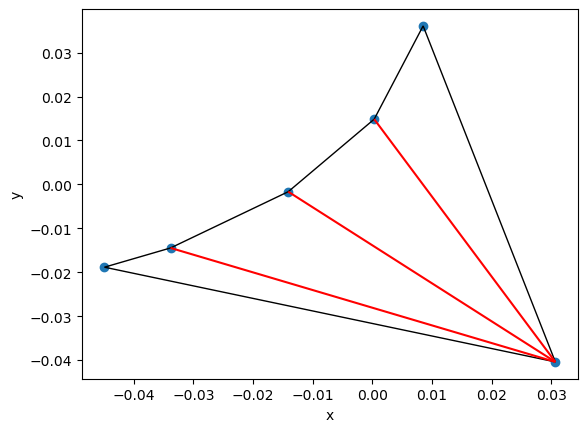

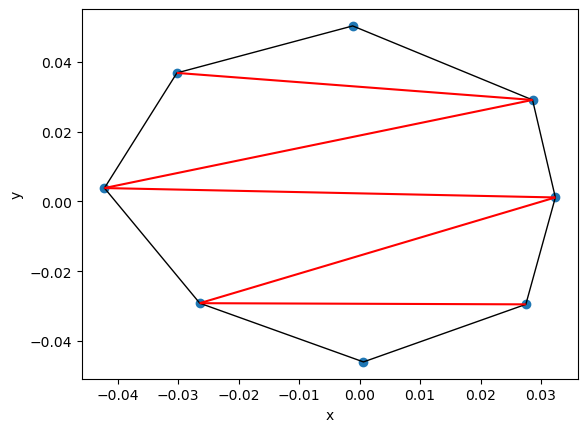

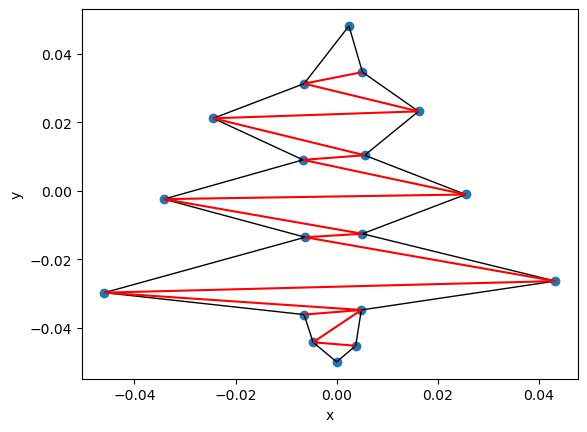

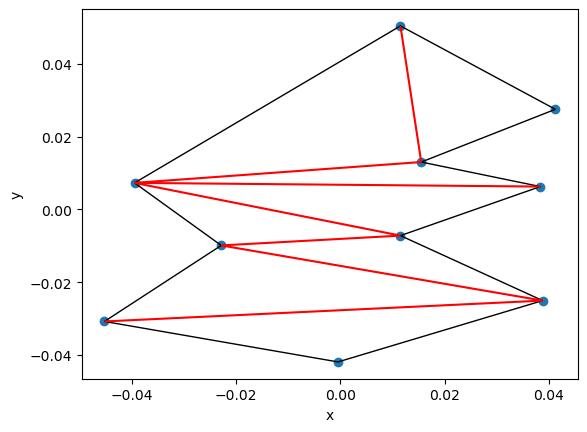

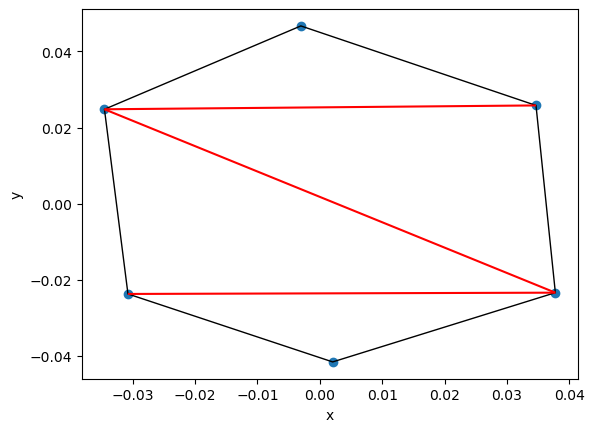

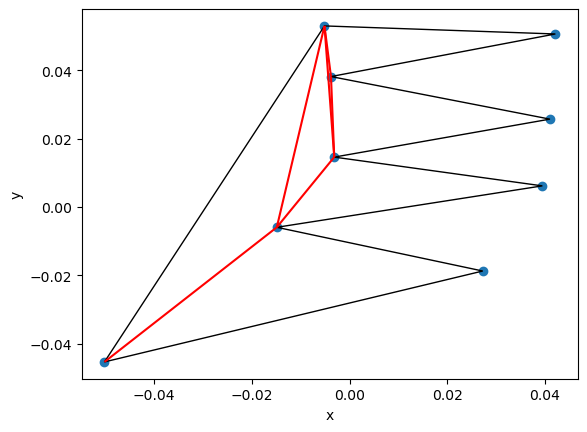

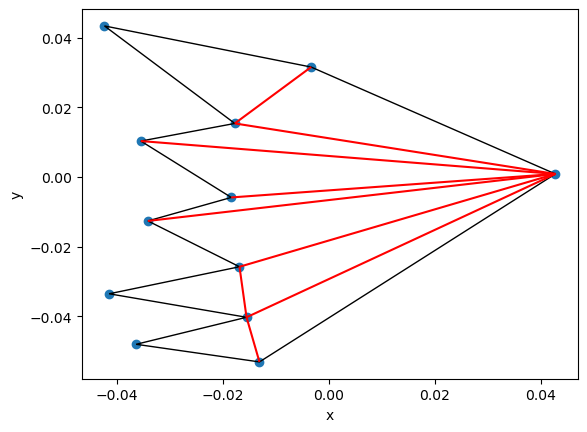

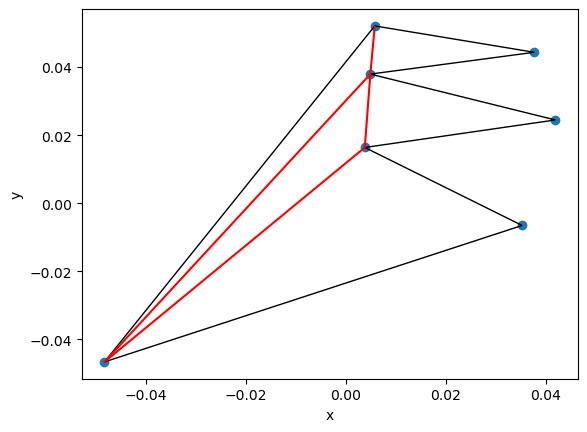

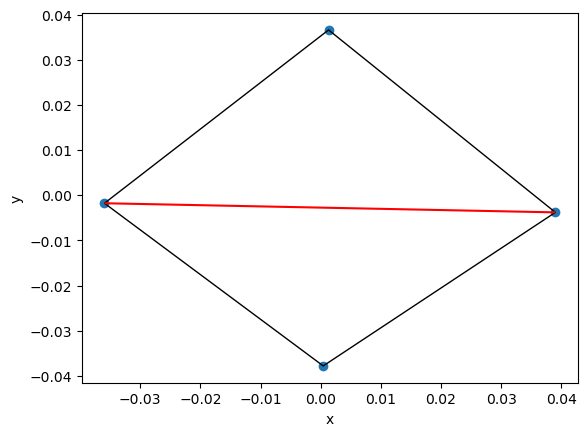

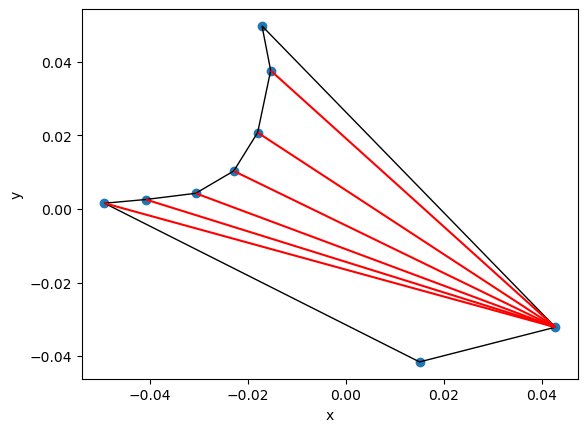

In [38]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

[(2, 17), (16, 3), (12, 5), (11, 5), (6, 8), (15, 4), (19, 2), (10, 6), (5, 10), (13, 5), (9, 6), (17, 3), (1, 19), (14, 4), (3, 15), (18, 2), (4, 13)]


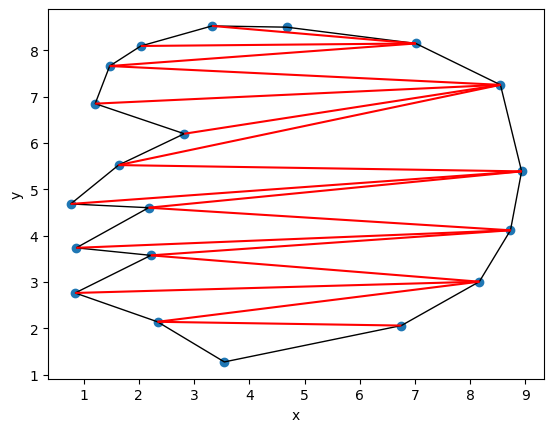

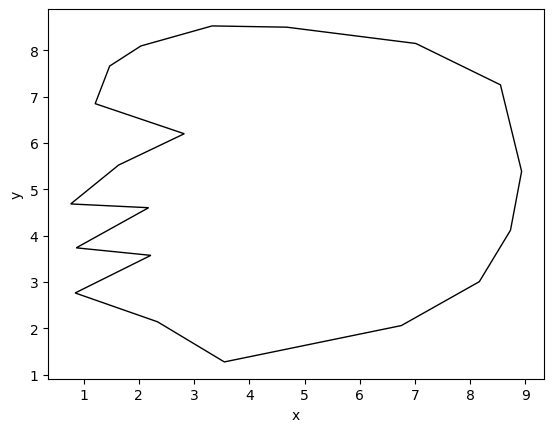

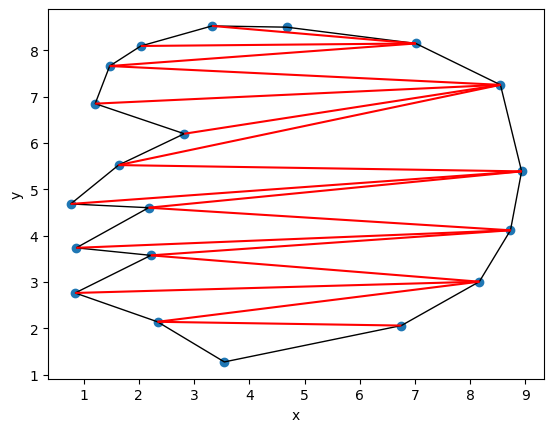

In [39]:
tri = triangulation(polygon)
print(tri)
draw_polygon(polygon)
draw_polygon_triangulation(polygon,tri)